## Linear Regression Machine Learning Implementation, Case: South Jakarta House Price
## Part 2: Exploratory Data Analysis (EDA)
### Author: Edycakra Immanuel Sinaga

In [3]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Dataset

In [4]:
df = pd.read_csv('../data/processed/olx_house_processed_ENG.csv', encoding='latin-1')

In [5]:
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
0,5,5,2,133,200,SHM,Jagakarsa,2460000000
1,6,1,1,148,148,SHM,Setia Budi,1100000000
2,5,4,3,84,200,SHM,Tebet,2100000000
3,4,3,2,160,190,SHM,Cilandak,3600000000
4,3,3,1,303,250,SHM,Kebayoran Lama,10500000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NBED    390 non-null    int64 
 1   NBATH   390 non-null    int64 
 2   NFLOOR  390 non-null    int64 
 3   BLDAR   390 non-null    int64 
 4   LNDAR   390 non-null    int64 
 5   CERT    390 non-null    object
 6   LOC     390 non-null    object
 7   Price   390 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 24.5+ KB


## Data Descriptions:

South jakarta house price dataset (scraped from OLX)

:Dataset Characteristics:
1. Number of Instances: 390
2. Number of Attributes: 7 numeric/categorical
3. Attribute Information (in order):
    - NBED    : amount of bedrooms 
    - NBATH   : amount of bathrooms 
    - NFLOOR  : amount of floors 
    - BLDAR   : size of the building area
    - LNDAR   : size of the land area
    - CERT    : type of certificates (SHM, HGB, Lainnya)
    - LOC     : location in south jakarta area
    - Price   : house price
4. Missing Attributes: None
5. Creator: Edycakra Immanuel Sinaga

# Checking Dataset

Check Duplicates

In [7]:
df.duplicated().sum()

0

Check Missing Values

In [8]:
df.isnull().sum()

NBED      0
NBATH     0
NFLOOR    0
BLDAR     0
LNDAR     0
CERT      0
LOC       0
Price     0
dtype: int64

Check Data Types

In [9]:
df.dtypes

NBED       int64
NBATH      int64
NFLOOR     int64
BLDAR      int64
LNDAR      int64
CERT      object
LOC       object
Price      int64
dtype: object

Quick Summary:
- No duplicates found
- No missing values
- Data types are correct

# Exploratory Data Analysis (EDA)

## Analysis for Numerical Attributes

Distribution Analysis

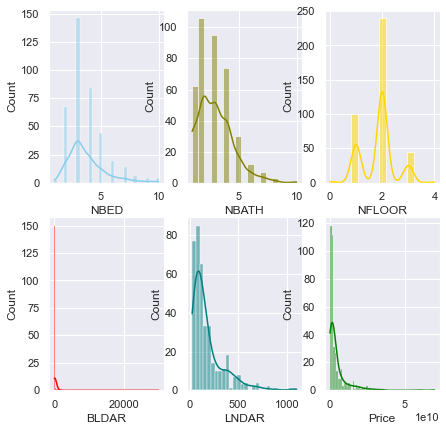

In [10]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=df, x="NBED", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="NBATH", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="NFLOOR", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="BLDAR", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df, x="LNDAR", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Price", kde=True, color="green", ax=axs[1, 2])

plt.show()

Boxplot Analysis

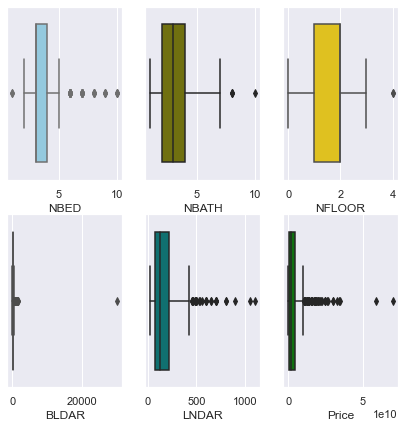

In [11]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.boxplot(data=df, x="NBED", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="NBATH", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="NFLOOR", color="gold", ax=axs[0, 2])
sns.boxplot(data=df, x="BLDAR", color="red", ax=axs[1, 0])
sns.boxplot(data=df, x="LNDAR", color="teal", ax=axs[1, 1])
sns.boxplot(data=df, x="Price", color="green", ax=axs[1, 2])

plt.show()

Remove Outliers from BLDAR, LNDAR, and Price (IQR approach)

In [12]:
for col_name in ['BLDAR', 'LNDAR', 'Price']:
  #quartile1
  val_Q1 = np.percentile(df[col_name], 25, interpolation= 'midpoint')

  #quartile3
  val_Q3 = np.percentile(df[col_name], 75, interpolation= 'midpoint')

  #IQR
  val_IQR = val_Q3 - val_Q1
  print("Removing outliers from ", col_name)
  print("Old Data Shape: ", df.shape)

  # Upper bound
  upper = np.where(df[col_name] >= (val_Q3+1.5*val_IQR))
  # Lower bound
  lower = np.where(df[col_name] <= (val_Q1-1.5*val_IQR))
  
  # Removing the Outliers 
  df.drop(upper[0], inplace = True)
  df.drop(lower[0], inplace = True)
  
  print("New Data Shape: ", df.shape)

  df.reset_index(inplace=True, drop=True)





Removing outliers from  BLDAR
Old Data Shape:  (390, 8)
New Data Shape:  (342, 8)
Removing outliers from  LNDAR
Old Data Shape:  (342, 8)
New Data Shape:  (321, 8)
Removing outliers from  Price
Old Data Shape:  (321, 8)
New Data Shape:  (298, 8)


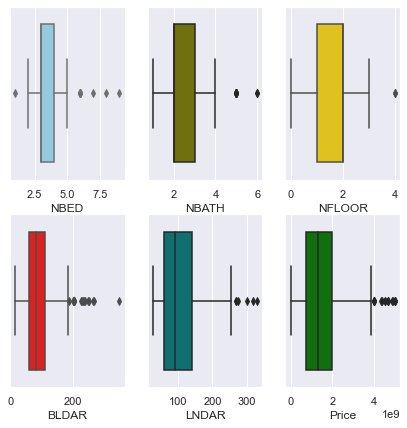

In [13]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.boxplot(data=df, x="NBED", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="NBATH", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="NFLOOR", color="gold", ax=axs[0, 2])
sns.boxplot(data=df, x="BLDAR", color="red", ax=axs[1, 0])
sns.boxplot(data=df, x="LNDAR", color="teal", ax=axs[1, 1])
sns.boxplot(data=df, x="Price", color="green", ax=axs[1, 2])

plt.show()

In [14]:
#removing outliers from Boxplot observation
indexAREA=df[ (df["NBED"] < 2) | (df["NBATH"] > 4)| (df["BLDAR"] > 200) | (df["LNDAR"] > 250) | (df["Price"] > 3000000000)].index
# indexAREA
df.drop(indexAREA, inplace=True)
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
1,6,1,1,148,148,SHM,Setia Budi,1100000000
2,5,4,3,84,200,SHM,Tebet,2100000000
4,3,3,2,134,130,SHM,Pasar Minggu,2800000000
6,3,2,1,132,100,SHM,Pesanggrahan,1480000000
7,3,4,2,92,147,SHM,Pesanggrahan,2300000000


New Distribution

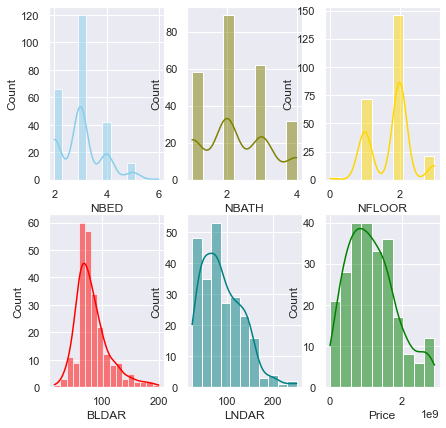

In [15]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=df, x="NBED", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="NBATH", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="NFLOOR", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="BLDAR", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df, x="LNDAR", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Price", kde=True, color="green", ax=axs[1, 2])

plt.show()

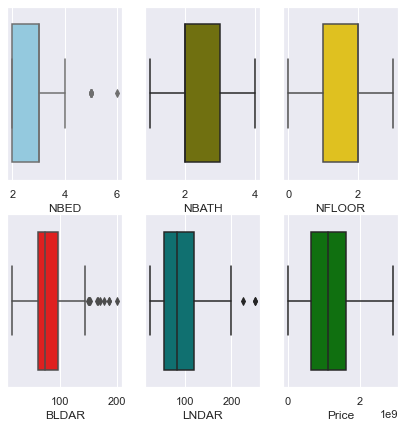

In [16]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.boxplot(data=df, x="NBED", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="NBATH", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="NFLOOR", color="gold", ax=axs[0, 2])
sns.boxplot(data=df, x="BLDAR", color="red", ax=axs[1, 0])
sns.boxplot(data=df, x="LNDAR", color="teal", ax=axs[1, 1])
sns.boxplot(data=df, x="Price", color="green", ax=axs[1, 2])

plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 1 to 297
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NBED    241 non-null    int64 
 1   NBATH   241 non-null    int64 
 2   NFLOOR  241 non-null    int64 
 3   BLDAR   241 non-null    int64 
 4   LNDAR   241 non-null    int64 
 5   CERT    241 non-null    object
 6   LOC     241 non-null    object
 7   Price   241 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 26.9+ KB


Dataset Overview (Numeric Columns)

In [18]:
df.describe(include=[np.number])

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,Price
count,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02
mean,3.012448,2.282158,1.771784,81.680498,90.717842,1.168359e+09
std,0.829062,0.976416,0.607070,29.906827,44.278795,6.804327e+08
min,2.000000,1.000000,0.000000,15.000000,26.000000,5.000000e+06
25%,2.000000,2.000000,1.000000,60.000000,56.000000,6.250000e+08
50%,3.000000,2.000000,2.000000,72.000000,83.000000,1.100000e+09
75%,3.000000,3.000000,2.000000,95.000000,120.000000,1.600000e+09
max,6.000000,4.000000,3.000000,200.000000,250.000000,2.900000e+09


In [19]:
nfloors= df["NFLOOR"]
new_nfloors=[]
for i in nfloors:
  if i == 0:
    new_nfloors.append(1)
  else:
    new_nfloors.append(i)

df["NFLOOR"] = new_nfloors

In [20]:
df.describe(include=[np.number])

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,Price
count,241.000000,241.000000,241.000000,241.000000,241.000000,2.410000e+02
mean,3.012448,2.282158,1.780083,81.680498,90.717842,1.168359e+09
std,0.829062,0.976416,0.589295,29.906827,44.278795,6.804327e+08
min,2.000000,1.000000,1.000000,15.000000,26.000000,5.000000e+06
25%,2.000000,2.000000,1.000000,60.000000,56.000000,6.250000e+08
50%,3.000000,2.000000,2.000000,72.000000,83.000000,1.100000e+09
75%,3.000000,3.000000,2.000000,95.000000,120.000000,1.600000e+09
max,6.000000,4.000000,3.000000,200.000000,250.000000,2.900000e+09


In [21]:
#write to csv 
df.to_csv('../data/final/olx_house_final_ENG.csv', index=False)

#### Correlation Between Numeric Attributes and Price Attribute

In [22]:
df.corr()["Price"]

NBED      0.616716
NBATH     0.681471
NFLOOR    0.501793
BLDAR     0.545263
LNDAR     0.815953
Price     1.000000
Name: Price, dtype: float64

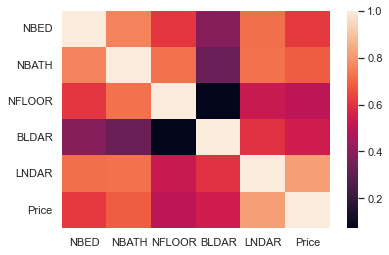

In [23]:
sns.heatmap(df.corr())

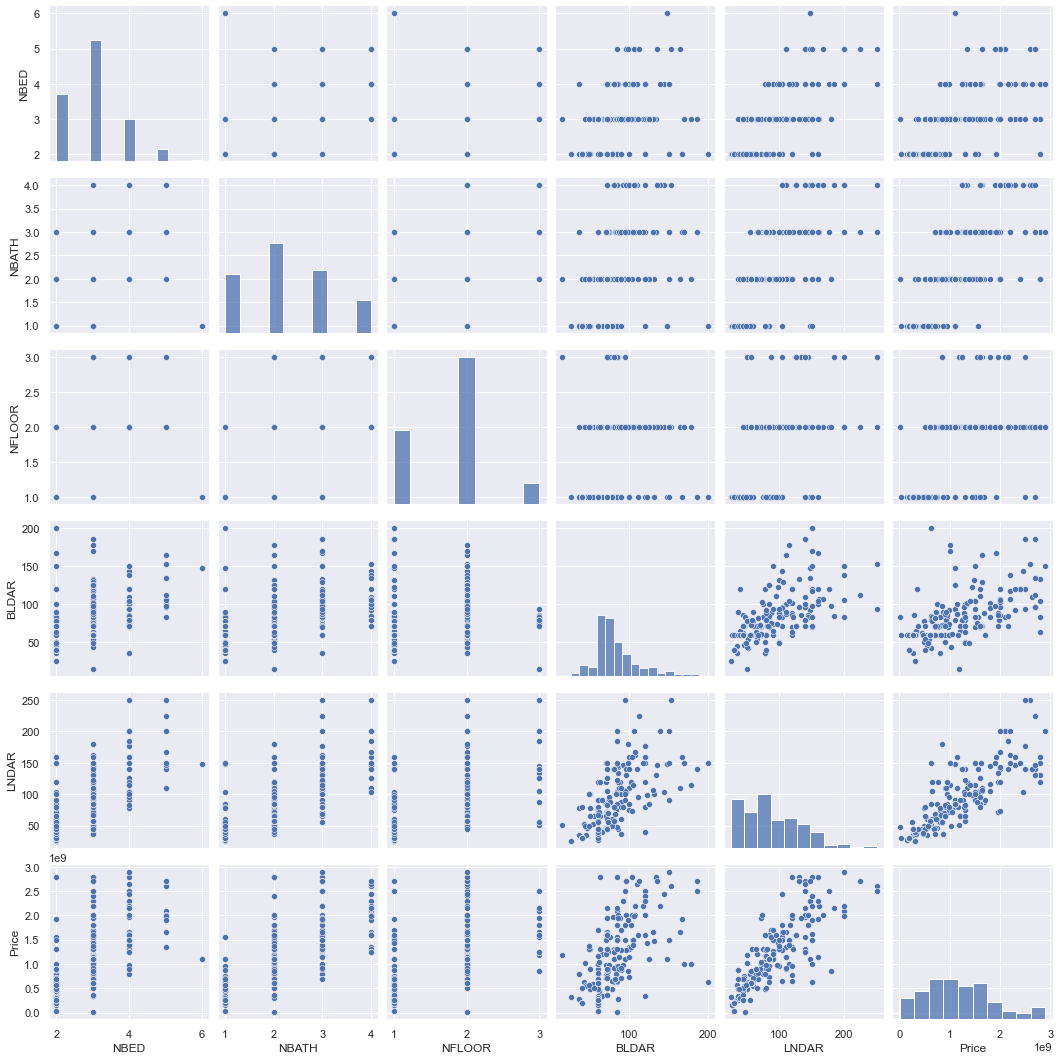

In [24]:
sns.pairplot(df)

## Analysis for Categorical Attributes

Median price of each type of certificate

Text(0, 0.5, 'Sertifikasi')

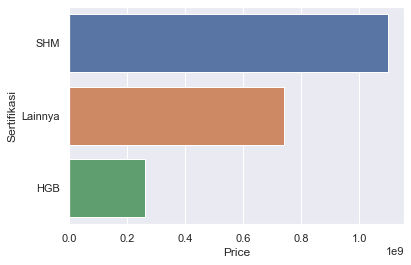

In [25]:
from numpy import median

sns.barplot(
    data=df, x="Price", y="CERT",estimator=median,
    # errorbar=("pi", 50), capsize=.4, errcolor=".5",
    # linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
    errorbar= None, order=df.groupby('CERT')["Price"].median().sort_values(ascending=False).index
)
plt.ylabel("Sertifikasi")


Text(0, 0.5, 'Lokasi di Jakarta Selatan')

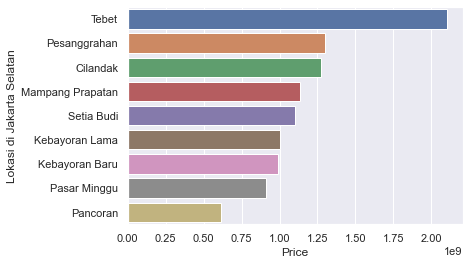

In [26]:
sns.barplot(
    data=df, x="Price", y="LOC",estimator=median,
    # errorbar=("pi", 50), capsize=.4, errcolor=".5",
    # linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0),
    errorbar= None, order=df.groupby('LOC')["Price"].median().sort_values(ascending=False).index
)
plt.ylabel("Lokasi di Jakarta Selatan")


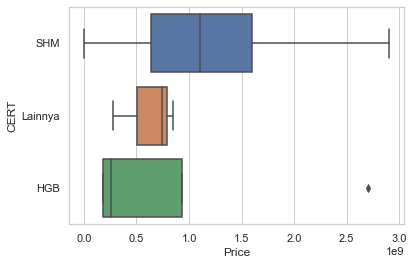

In [27]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="CERT", data=df, order=df.groupby('CERT')["Price"].median().sort_values(ascending=False).index)

In [28]:
#removing outliers from sertifikasi = "SHM"
indexCERT=df[ (df["CERT"] =="HGB") & (df["Price"] > 2000000000)].index
# indexCERT
df.drop(indexCERT, inplace=True)
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
1,6,1,1,148,148,SHM,Setia Budi,1100000000
2,5,4,3,84,200,SHM,Tebet,2100000000
4,3,3,2,134,130,SHM,Pasar Minggu,2800000000
6,3,2,1,132,100,SHM,Pesanggrahan,1480000000
7,3,4,2,92,147,SHM,Pesanggrahan,2300000000


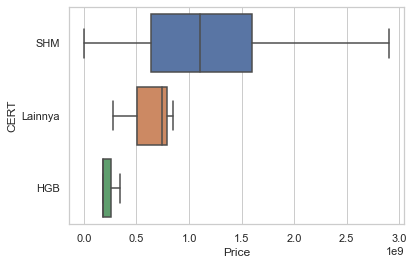

In [29]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="CERT", data=df, order=df.groupby('CERT')["Price"].median().sort_values(ascending=False).index)

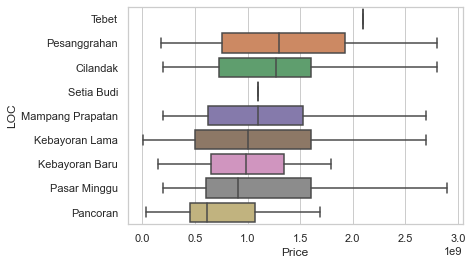

In [30]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="LOC", data=df, order=df.groupby('LOC')["Price"].median().sort_values(ascending=False).index)

In [31]:
#removing outliers from: Pesanggrahan, Mampang Prapatan, Kebayoran Lama, Kebayoran Baru, Pancoran 
indexLOC=df[ (df["LOC"] =="Pesanggrahan") & (df["Price"] > 3000000000) 
            | (df["LOC"] =="Mampang Prapatan") & (df["Price"] > 3000000000)
            | (df["LOC"] =="Kebayoran Lama") & (df["Price"] > 3000000000)
            | (df["LOC"] =="Kebayoran Baru") & (df["Price"] > 3000000000)
            | (df["LOC"] =="Pancoran") & (df["Price"] > 3000000000)].index
# indexLOC
df.drop(indexLOC, inplace=True)
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
1,6,1,1,148,148,SHM,Setia Budi,1100000000
2,5,4,3,84,200,SHM,Tebet,2100000000
4,3,3,2,134,130,SHM,Pasar Minggu,2800000000
6,3,2,1,132,100,SHM,Pesanggrahan,1480000000
7,3,4,2,92,147,SHM,Pesanggrahan,2300000000


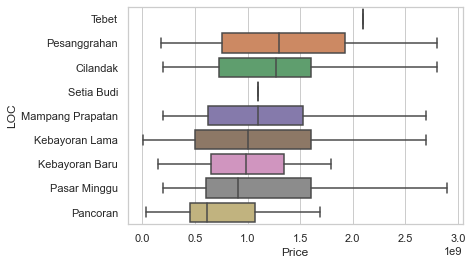

In [32]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="LOC", data=df, order=df.groupby('LOC')["Price"].median().sort_values(ascending=False).index)

# Final Overview

In [33]:
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
1,6,1,1,148,148,SHM,Setia Budi,1100000000
2,5,4,3,84,200,SHM,Tebet,2100000000
4,3,3,2,134,130,SHM,Pasar Minggu,2800000000
6,3,2,1,132,100,SHM,Pesanggrahan,1480000000
7,3,4,2,92,147,SHM,Pesanggrahan,2300000000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 297
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NBED    240 non-null    int64 
 1   NBATH   240 non-null    int64 
 2   NFLOOR  240 non-null    int64 
 3   BLDAR   240 non-null    int64 
 4   LNDAR   240 non-null    int64 
 5   CERT    240 non-null    object
 6   LOC     240 non-null    object
 7   Price   240 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 26.9+ KB


In [35]:
df.describe()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,Price
count,240.000000,240.000000,240.000000,240.000000,240.000000,2.400000e+02
mean,3.004167,2.279167,1.779167,81.554167,90.162500,1.161977e+09
std,0.820745,0.977350,0.590354,29.904821,43.522161,6.745883e+08
min,2.000000,1.000000,1.000000,15.000000,26.000000,5.000000e+06
25%,2.000000,2.000000,1.000000,60.000000,55.750000,6.250000e+08
50%,3.000000,2.000000,2.000000,72.000000,82.500000,1.100000e+09
75%,3.000000,3.000000,2.000000,94.250000,120.000000,1.600000e+09
max,6.000000,4.000000,3.000000,200.000000,250.000000,2.900000e+09


## Numerical Analysis

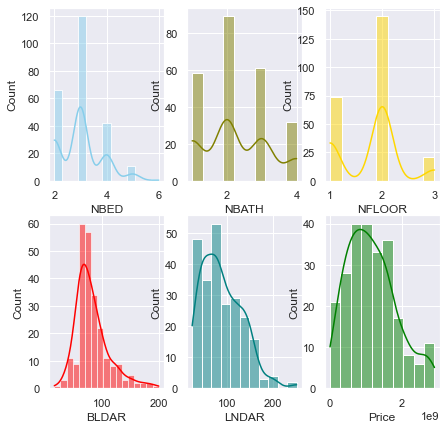

In [36]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.histplot(data=df, x="NBED", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="NBATH", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="NFLOOR", kde=True, color="gold", ax=axs[0, 2])
sns.histplot(data=df, x="BLDAR", kde=True, color="red", ax=axs[1, 0])
sns.histplot(data=df, x="LNDAR", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="Price", kde=True, color="green", ax=axs[1, 2])

plt.show()

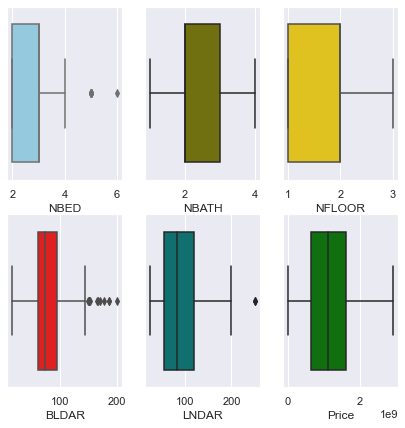

In [37]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.boxplot(data=df, x="NBED", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="NBATH", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="NFLOOR", color="gold", ax=axs[0, 2])
sns.boxplot(data=df, x="BLDAR", color="red", ax=axs[1, 0])
sns.boxplot(data=df, x="LNDAR", color="teal", ax=axs[1, 1])
sns.boxplot(data=df, x="Price", color="green", ax=axs[1, 2])

plt.show()

In [38]:
#removing outliers from BLDAR and LNDAR
indexAREA=df[ (df["BLDAR"] > 200) | (df["LNDAR"] > 200)].index
# indexAREA
df.drop(indexAREA, inplace=True)
df.head()

,NBED,NBATH,NFLOOR,BLDAR,LNDAR,CERT,LOC,Price
1,6,1,1,148,148,SHM,Setia Budi,1100000000
2,5,4,3,84,200,SHM,Tebet,2100000000
4,3,3,2,134,130,SHM,Pasar Minggu,2800000000
6,3,2,1,132,100,SHM,Pesanggrahan,1480000000
7,3,4,2,92,147,SHM,Pesanggrahan,2300000000


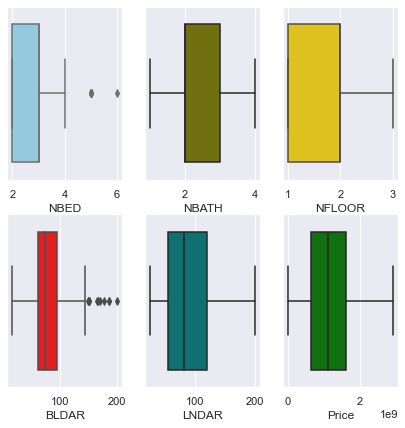

In [39]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 3, figsize=(7, 7))

sns.boxplot(data=df, x="NBED", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df, x="NBATH", color="olive", ax=axs[0, 1])
sns.boxplot(data=df, x="NFLOOR", color="gold", ax=axs[0, 2])
sns.boxplot(data=df, x="BLDAR", color="red", ax=axs[1, 0])
sns.boxplot(data=df, x="LNDAR", color="teal", ax=axs[1, 1])
sns.boxplot(data=df, x="Price", color="green", ax=axs[1, 2])

plt.show()

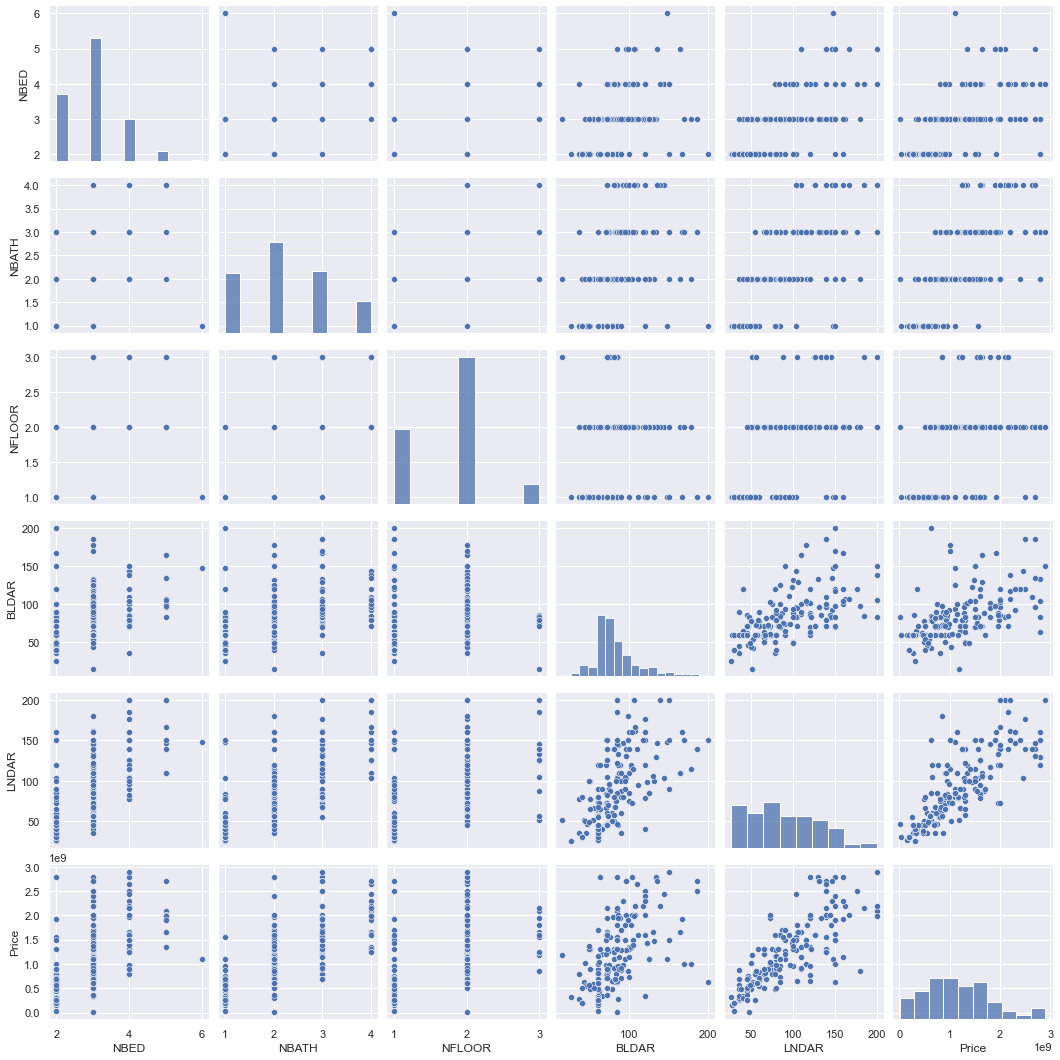

In [40]:
sns.pairplot(df)

## Categorical Analysis

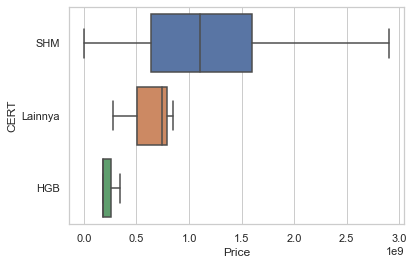

In [41]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="CERT", data=df, order=df.groupby('CERT')["Price"].median().sort_values(ascending=False).index)

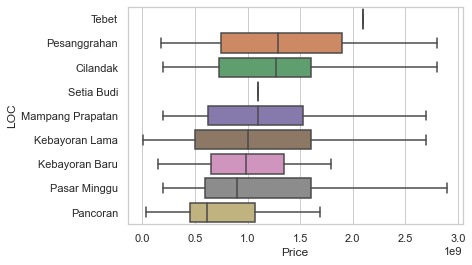

In [42]:
sns.set_style("whitegrid")
sns.boxplot(x="Price", y="LOC", data=df, order=df.groupby('LOC')["Price"].median().sort_values(ascending=False).index)

In [43]:
#write to csv 
df.to_csv('../data/final/olx_house_final_improve_ENG.csv', index=False)

# FIN